# Regularized Linear Regression and Bias v.s. Variance

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.optimize as opt

import seaborn as sns

In [122]:
data = loadmat('/Users/hsunku/Desktop/github/MachineLearning_AndrewNg/exercises/machine-learning-ex5/ex5/ex5data1.mat')

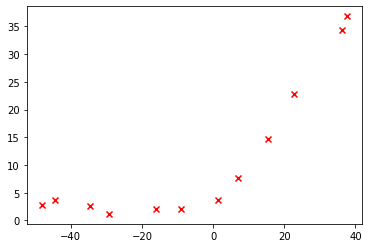

In [123]:
X = data.get('X')
y = data.get('y')
Xtest = data.get('Xtest')
ytest = data.get('ytest')
Xval = data.get('Xval')
yval = data.get('yval')
plt.scatter(X,y,color='r',marker='x')
plt.show()
X = np.insert(X,0,np.ones(X.shape[0]),axis=1)
Xtext = np.insert(Xtest,0,np.ones(Xtest.shape[0]),axis=1)
Xval = np.insert(Xval,0,np.ones(Xval.shape[0]),axis=1)


In [159]:
def cost(theta,X,y,regularized_lambda=0):
    m = X.shape[0]
    
    inner = X @ theta - y.T
    square_num = sum(np.power(inner.T,2))
#     theta[0] = 0
    cost = square_num/(2*m) + regularized_lambda*sum(theta**2)/(2*m)
    
    return cost#[0,0]

def gradient(theta,X,y,regularized_lambda=0):
    m = X.shape[0]
    
    inner = X @ theta - y.T
    regularized_term = np.zeros(theta.shape[0])
    regularized_term[1:] = theta[1:] * regularized_lambda/m
    new_theta = sum(inner @ X)/m + regularized_term
    return new_theta

In [160]:
cost(theta=np.ones(X.shape[1]),X=X,y=y)

array([303.95152555])

In [161]:
gradient(theta=np.ones(X.shape[1]), X = X, y= y, regularized_lambda=1)

array([-15.30301567, 598.25074417])

In [162]:
def linear_regression(X,y,regularized_lambda = 0):
    initial_theta = np.ones(X.shape[1])
    
    ''' train linear regression'''
    res = opt.minimize(fun = cost,
                       x0 = initial_theta,
                       args = (X,y,regularized_lambda),
                       method = 'TNC',
                       jac=gradient,
                       options={'disp': True})
    return res
    

In [163]:
final_theta = linear_regression(X, y, regularized_lambda=0).get('x')

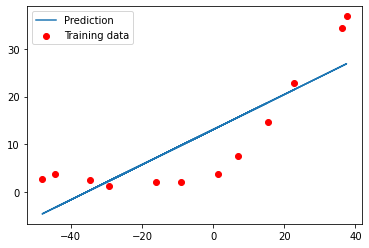

[13.08790398  0.36777923]


In [164]:
b = final_theta[0] # intercept
m = final_theta[1] # slope

plt.scatter(X[:,1], y,color='r', label="Training data")
plt.plot(X[:, 1], X[:, 1]*m + b, label="Prediction")
plt.legend(loc=2)
plt.show()
print(final_theta)

In [165]:
training_cost, cv_cost = [], []
m = X.shape[0]
for i in range(1, m+1):
#     print('i={}'.format(i))
    res = linear_regression(X[:i, :], y[:i], regularized_lambda=0)
    
    tc = cost(res.x, X[:i, :], y[:i])#, regularized_lambda=0)
    cv = cost(res.x, Xval, yval)#, regularized_lambda=0)
#     print('tc={}, cv={}'.format(tc, cv))
    
    training_cost.append(tc)
    cv_cost.append(cv)

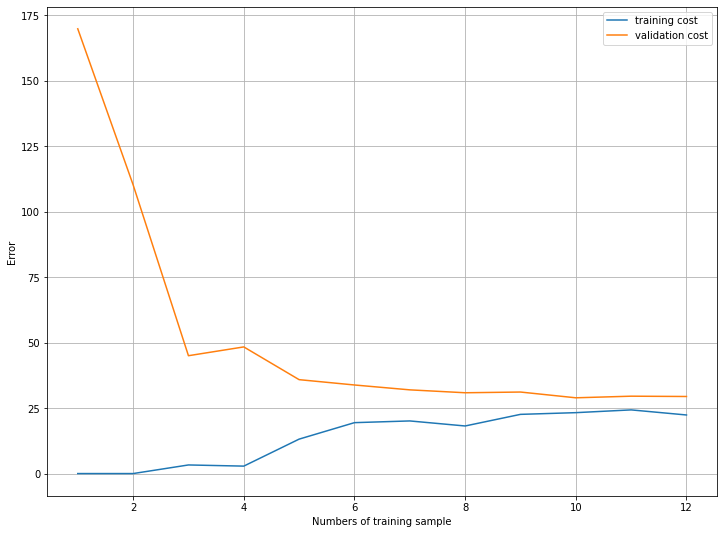

It is clear that this model is underfitting with high bias, we may wanna add more features or add more polynomial 
terms.
Underfitting: high training error and high validation error, adding more sample will not improve models's performance.




In [166]:
plt.figure(figsize=(12,9))
plt.grid()
plt.plot(np.arange(1,m+1),training_cost,label='training cost')
plt.plot(np.arange(1,m+1),cv_cost,label='validation cost')
plt.legend()
plt.ylabel('Error')
plt.xlabel('Numbers of training sample')
plt.show()
print('''It is clear that this model is underfitting with high bias, we may wanna add more features or add more polynomial 
terms.
Underfitting: high training error and high validation error, adding more sample will not improve models's performance.

''')
      
      

# Polynomial Linear Regression

In [167]:
def poly_features(X, power, as_ndarray=False):
    m = X.shape[0]
    data = pd.DataFrame()
    data['f1']=X.reshape(1,m)[0]
    for i in range(2,power+1):
        data['f{}'.format(i)]=np.power(X,i).reshape(1,m)[0]

    return np.matrix(data) if as_ndarray else data

def prepare_poly_data(*args, power):
    """
    args: keep feeding in X, Xval, or Xtest
        will return in the same order
    """
    def prepare(x):
        # expand feature
        df = poly_features(x, power=power)

        # normalization
        ndarr = np.matrix(normalize_feature(df))
        # add intercept term
        return np.insert(ndarr, 0, np.ones(ndarr.shape[0]), axis=1)

    return [prepare(x) for x in args]

def normalize_feature(df):
    """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [168]:
data = loadmat('/Users/hsunku/Desktop/github/MachineLearning_AndrewNg/exercises/machine-learning-ex5/ex5/ex5data1.mat')
X = data.get('X')
y = data.get('y')
Xtest = data.get('Xtest')
ytest = data.get('ytest')
Xval = data.get('Xval')
yval = data.get('yval')


In [169]:
X_poly, Xval_poly, Xtest_poly = prepare_poly_data(X,Xval,Xtest,power=8)


In [170]:
def plot_learning_curve(X,y,Xval,yval,regularized_lambda=0):
    training_cost,cv_cost = [], []
    m = X.shape[0]
    
    for i in range(1,m+1):
        res = linear_regression(X[:i],y[:i],regularized_lambda = regularized_lambda)
        
        tv = cost(res.x, X[:i], y[:i], regularized_lambda=0)[0,0]
        cv = cost(res.x, Xval, yval, regularized_lambda=0)[0,0]
        
        training_cost.append(tv)
        cv_cost.append(cv)
    
    plt.plot(np.arange(1,m+1),training_cost,label='training cost')
    plt.plot(np.arange(1,m+1),cv_cost,label='cv cost')
    plt.legend()
            


From the graph, we could see the training_cost is close to zero all the time while cv cost is lot higher, leading 
to overfitting of the model. we could try to increase lambda to tackle this issue.



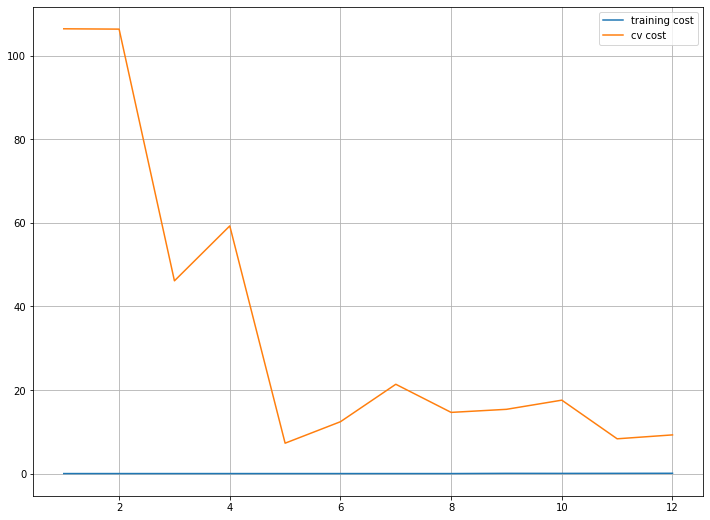

In [171]:
plt.figure(figsize=(12,9))
plt.grid()
plot_learning_curve(X_poly,y,Xval_poly,yval,regularized_lambda=0)
print('''
From the graph, we could see the training_cost is close to zero all the time while cv cost is lot higher, leading 
to overfitting of the model. we could try to increase lambda to tackle this issue.
''')



From the graph, we could see the training_cost is no longer zero, meaning we have reduced the severity of overfitting
of this polynomial model.



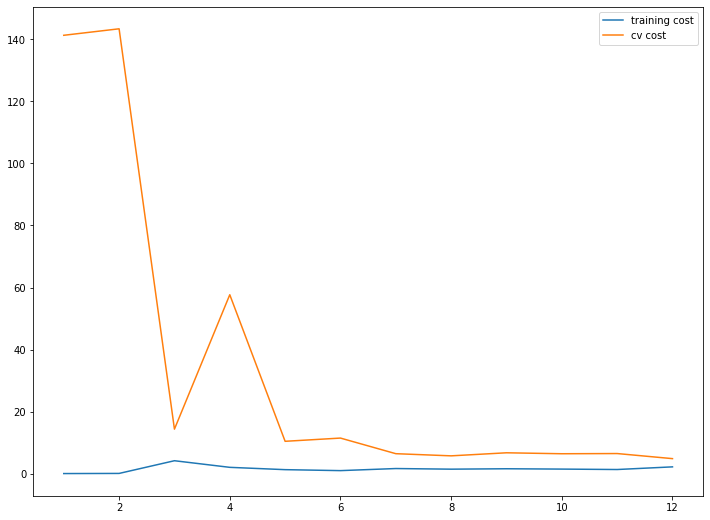

In [172]:
plt.figure(figsize=(12,9))
plot_learning_curve(X_poly,y,Xval_poly,yval,regularized_lambda=1)
print('''
From the graph, we could see the training_cost is no longer zero, meaning we have reduced the severity of overfitting
of this polynomial model.
''')

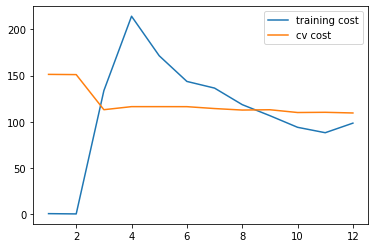

In [173]:
plot_learning_curve(X_poly, y, Xval_poly, yval, regularized_lambda=100)


In [174]:
l_candidate = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
training_cost, cv_cost = [], []

In [175]:
training_cost, cv_cost = [], []
for l in l_candidate:
    res = linear_regression(X_poly, y, regularized_lambda = l)
    
    tc = cost(res.x, X_poly, y,regularized_lambda = 0)[0,0]
    cv = cost(res.x, Xval_poly, yval, regularized_lambda = 0)[0,0]
    
    training_cost.append(tc)
    cv_cost.append(cv)

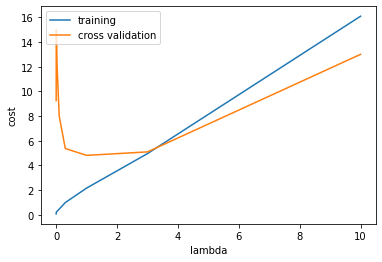

In [176]:
plt.plot(l_candidate, training_cost, label='training')
plt.plot(l_candidate, cv_cost, label='cross validation')
plt.legend(loc=2)

plt.xlabel('lambda')

plt.ylabel('cost')
plt.show()

In [177]:
l_candidate[np.argmin(cv_cost)]

1

In [119]:
# use test data to compute the cost
for l in l_candidate:
    theta = linear_regression(X_poly, y, regularized_lambda=l).x
    print('test cost(l={}) = {}'.format(l, cost(theta, Xtest_poly, ytest,regularized_lambda=l)[0,0]))
for l in l_candidate:
    theta = linear_regression(X_poly, y, regularized_lambda=l).x
    print('validation cost(l={}) = {}'.format(l, cost(theta, Xval_poly, yval,regularized_lambda=l)[0,0]))
for l in l_candidate:
    theta = linear_regression(X_poly, y, regularized_lambda=l).x
    print('training cost(l={}) = {}'.format(l, cost(theta, X_poly, y,regularized_lambda=l)[0,0]))

test cost(l=0) = 9.799399498688894
test cost(l=0.001) = 10.997574281825639
test cost(l=0.003) = 11.318292539625359
test cost(l=0.01) = 10.998341730601972
test cost(l=0.03) = 10.342927543928738
test cost(l=0.1) = 9.494022152137152
test cost(l=0.3) = 9.7782037132597
test cost(l=1) = 13.558126071519661
test cost(l=3) = 26.965383526093916
test cost(l=10) = 67.55050245338025
validation cost(l=0) = 9.252825487149469
validation cost(l=0.001) = 10.360140671822347
validation cost(l=0.003) = 14.951231895179502
validation cost(l=0.01) = 15.140328630224754
validation cost(l=0.03) = 12.401695454239215
validation cost(l=0.1) = 8.86140626493679
validation cost(l=0.3) = 7.47177710925234
validation cost(l=1) = 10.717833493183058
validation cost(l=3) = 20.268441420922144
validation cost(l=10) = 52.83653509322773
training cost(l=0) = 0.0669542845122124
training cost(l=0.001) = 0.18032124055655557
training cost(l=0.003) = 0.2656849522967617
training cost(l=0.01) = 0.4375091305656642
training cost(l=0.03) 

In [178]:
data = pd.DataFrame()
m=Xtest.shape[0]
data['X']=Xtest.reshape(1,m)[0]
data['y']=ytest.reshape(1,m)[0]
for i in l_candidate:
    data['pred_l_{}'.format(i)] = np.array(Xtest_poly @ linear_regression(X_poly, y, regularized_lambda=i).x).reshape(1,m)[0]
data = data.sort_values('X',ascending=True)
data
    
    
    

,X,y,pred_l_0,pred_l_0.001,pred_l_0.003,pred_l_0.01,pred_l_0.03,pred_l_0.1,pred_l_0.3,pred_l_1,pred_l_3,pred_l_10
18,-55.940571,6.038089,2.565883,2.810975,2.968867,3.001925,2.930105,2.859286,2.935515,3.134948,2.073265,1.312975
2,-51.206938,0.130430,3.524466,3.628894,3.459596,3.350032,3.497786,3.602389,3.331622,2.534750,2.232865,2.873772
5,-40.319529,0.799508,1.768813,2.033580,2.131131,2.316486,2.495530,2.511852,2.229386,1.931268,2.919432,5.125867
1,-37.912164,5.397690,1.558646,1.725818,1.820552,2.003423,2.132419,2.123812,1.924379,1.906480,3.085782,5.452901
19,-35.708598,4.692740,1.465387,1.506500,1.569083,1.723999,1.802851,1.782688,1.674775,1.914460,3.240388,5.717176
0,-33.318004,3.316890,1.449113,1.329610,1.333199,1.437358,1.463395,1.445435,1.449076,1.955930,3.411838,5.973778
16,-23.669630,2.477355,1.675555,1.007053,0.735918,0.604328,0.528080,0.676446,1.173363,2.477126,4.186231,6.828139
6,-14.541532,2.824792,1.632993,1.030946,0.774727,0.646214,0.696940,1.130227,1.987619,3.532522,5.152924,7.591858
11,-12.766861,8.270398,1.632555,1.107453,0.891231,0.794940,0.887965,1.373161,2.272177,3.807837,5.380187,7.753701
17,-9.011801,6.566065,1.751922,1.420641,1.309842,1.302185,1.489613,2.065750,3.011899,4.472905,5.913775,8.121823


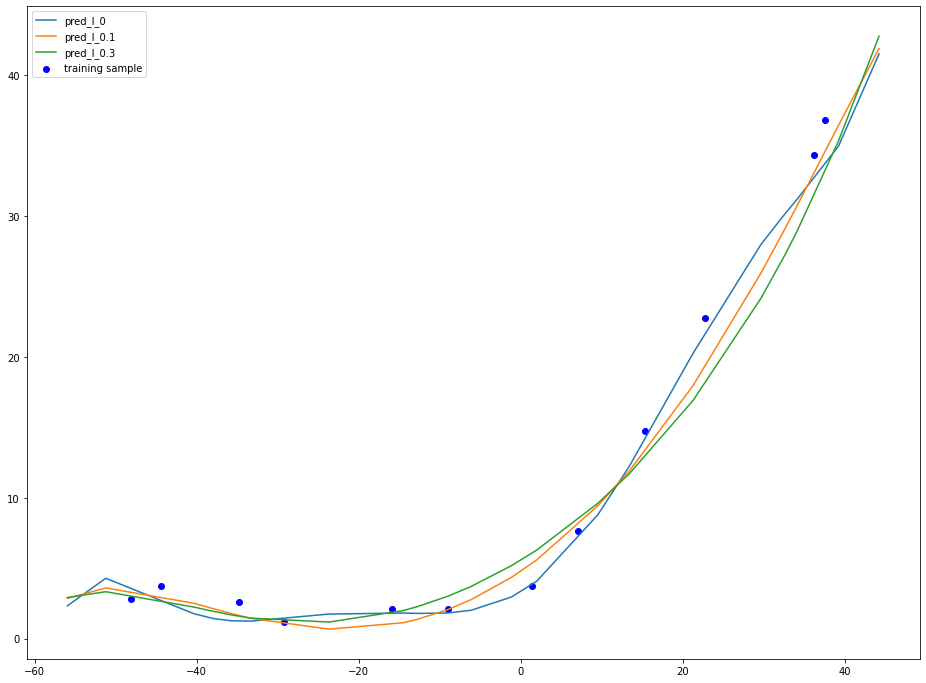

In [699]:
plt.figure(figsize=(16,12))
a = ['pred_l_0','pred_l_0.1','pred_l_0.3']
for i in a:#data.columns[7:10]:
    plt.plot(data['X'],data['{}'.format(i)],label='{}'.format(i))
# plt.scatter(data['X'],data['y'],color='r',label='test sample')
plt.scatter(X,y,color='b',label='training sample')

plt.legend()
plt.show()

